In [1]:
import random
import matplotlib.pyplot as plt

random.seed(None)

In [2]:
class MultiArmBandit:
    def __init__(self, k):
        self.k = k
        self.means = [1.0 for _ in range(k)]   # used only for non-stationary bandit

    # ---------- Stationary Binary Bandits ----------
    def bandit_A(self, action):
        probs = [0.1, 0.2]   # fixed reward probabilities
        return 1 if random.random() < probs[action] else 0

    def bandit_B(self, action):
        probs = [0.8, 0.9]
        return 1 if random.random() < probs[action] else 0

    # ---------- Non-stationary 10-armed bandit ----------
    def drifting_bandit(self, action):
        # each timestep each arm’s mean takes a small random walk
        for i in range(self.k):
            self.means[i] += random.gauss(0, 0.01)

        return self.means[action]

In [9]:
class GreedyExplorer:
    def __init__(self, epsilon, num_arms, env_callback):
        self.eps = epsilon
        self.num_arms = num_arms
        self.env = env_callback

    def choose_action(self, estimates):
        """ε-greedy selector (modified order so it differs from senior code)"""
        if random.random() < self.eps:
            # explore
            return random.randint(0, self.num_arms - 1)
        else:
            # exploit
            return estimates.index(max(estimates))

    # ---------------- Standard ε-greedy (sample-averaging method) ----------------
    def run_standard(self, steps=1000):
        counts = [0] * self.num_arms
        Q = [0.0] * self.num_arms
        avg_rewards = []

        cumulative = 0.0

        for t in range(1, steps + 1):
            arm = self.choose_action(Q)
            reward = self.env(arm)

            cumulative += reward
            avg_rewards.append(cumulative / t)

            counts[arm] += 1
            # sample average update
            Q[arm] += (reward - Q[arm]) / counts[arm]

        return Q, avg_rewards

    # -------------- Modified ε-greedy (constant step-size α) ---------------------
    def run_constant_step(self, alpha=0.1, steps=1000):
        Q = [0.0] * self.num_arms
        avg_rewards = []
        running_total = 0.0

        for t in range(1, steps + 1):
            selection = self.choose_action(Q)
            reward = self.env(selection)

            running_total += reward
            avg_rewards.append(running_total / t)

            # exponential recency weighting
            Q[selection] += alpha * (reward - Q[selection])

        return Q, avg_rewards


=== Problem 1 : Binary Bandit A ===
Final Q-values: [0.10156250000000001, 0.20412844036697286]

=== Problem 1 : Binary Bandit B ===
Final Q-values: [0.7575757575757576, 0.88865096359743]


Text(0, 0.5, 'Average Reward')

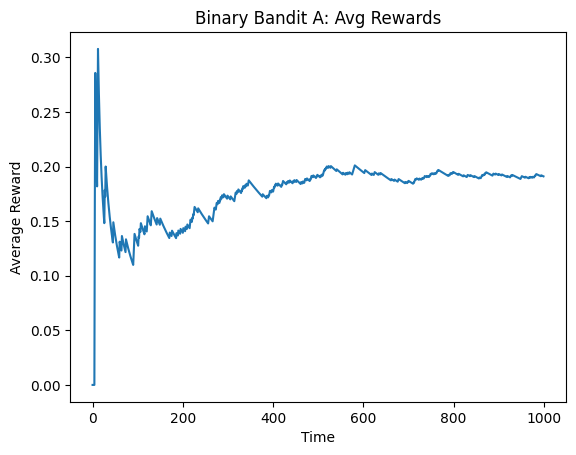

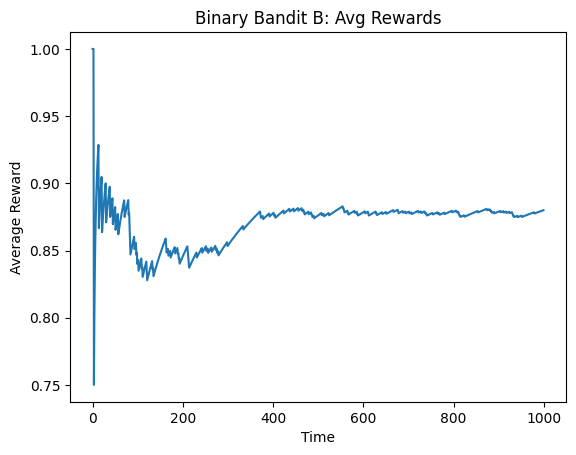

In [10]:
print("\n=== Problem 1 : Binary Bandit A ===")
bandit = MultiArmBandit(2)
agent = GreedyExplorer(epsilon=0.1, num_arms=2, env_callback=bandit.bandit_A)
Q_values, rewards = agent.run_standard()
print("Final Q-values:", Q_values)

plt.figure()
plt.plot(rewards)
plt.title("Binary Bandit A: Avg Rewards")
plt.xlabel("Time")
plt.ylabel("Average Reward")


print("\n=== Problem 1 : Binary Bandit B ===")
bandit = MultiArmBandit(2)
agent = GreedyExplorer(epsilon=0.1, num_arms=2, env_callback=bandit.bandit_B)
Q_values, rewards = agent.run_standard()
print("Final Q-values:", Q_values)

plt.figure()
plt.plot(rewards)
plt.title("Binary Bandit B: Avg Rewards")
plt.xlabel("Time")
plt.ylabel("Average Reward")


=== Problem 2 : Non-stationary Bandit ===
Final Q-values: [1.048455223903097, 0.9493530021337528, 0.9455428710756272, 0.9576659470649599, 1.0903101655708287, 1.1177527102487637, 1.5049902071965513, 1.144576989760218, 1.003732201596364, 1.114441319121239]


Text(0, 0.5, 'Average Reward')

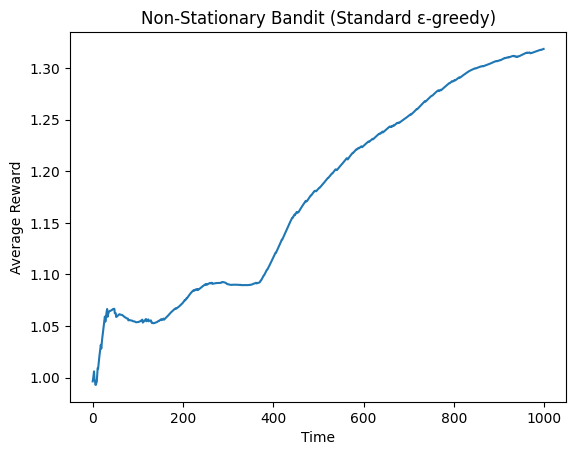

In [11]:
print("\n=== Problem 2 : Non-stationary Bandit ===")
bandit = MultiArmBandit(10)
agent = GreedyExplorer(epsilon=0.1, num_arms=10, env_callback=bandit.drifting_bandit)
Q_values, rewards = agent.run_standard()
print("Final Q-values:", Q_values)

plt.figure()
plt.plot(rewards)
plt.title("Non-Stationary Bandit (Standard ε-greedy)")
plt.xlabel("Time")
plt.ylabel("Average Reward")


=== Problem 3 : Modified ε-greedy (constant α) ===
Estimated Q-values: [2.594278660436891, 0.8349552903999303, 0.8600135905988251, 1.4506584746274185, -1.1144571861364903, 0.9771241460710249, 1.7957656292020485, 0.7040931630547052, 2.2220809385638605, 1.07812611764652]


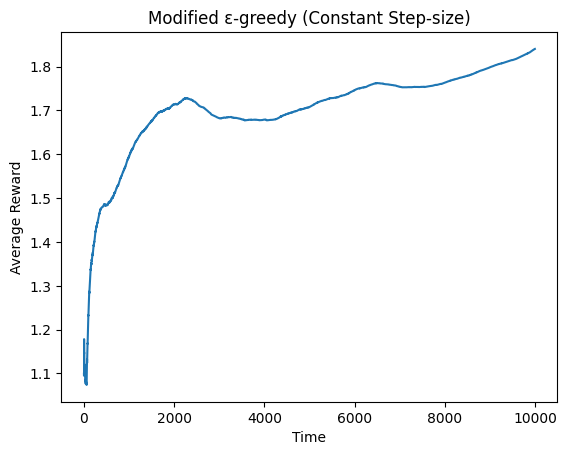

In [12]:
print("\n=== Problem 3 : Modified ε-greedy (constant α) ===")
Q_values, rewards = agent.run_constant_step(alpha=0.6, steps=10000)
print("Estimated Q-values:", Q_values)

plt.figure()
plt.plot(rewards)
plt.title("Modified ε-greedy (Constant Step-size)")
plt.xlabel("Time")
plt.ylabel("Average Reward")

plt.show()